# HOUSE PRICE PREDICTION

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
%matplotlib inline

In [2]:
#Loading the data
train = pd.read_csv("C:\\Users\\Vineet Bhatia\\Desktop\\Python Final Project\\Python Final Project\\Dataset\\train.csv")

In [3]:
test = pd.read_csv("C:\\Users\\Vineet Bhatia\\Desktop\\Python Final Project\\Python Final Project\\Dataset\\test.csv")

In [4]:
#Deleting duplicate values
train=train.drop_duplicates()
print('Shape After deleting duplicate values:', train.shape)

Shape After deleting duplicate values: (1460, 81)


In [5]:
test=test.drop_duplicates()
print('Shape After deleting duplicate values:', train.shape)

Shape After deleting duplicate values: (1460, 81)


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#Shape of data

In [10]:
len(train)
print('length of the data is', len(train))

length of the data is 1460


In [11]:
len(test)
print('length of the data is', len(test))

length of the data is 1459


In [12]:
train.shape

(1460, 81)

In [13]:
test.shape

(1459, 80)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [17]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [18]:
# Looking at the statistial distribution of the data
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [19]:
test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [20]:
#Looking at the train data missing values.
#looking at the total number of missing values in each column
NANcolumns=[]
i=-1
for a in train.isnull().sum():
    i+=1
    if a!=0:
        print(train.columns[i],a)
        NANcolumns.append(train.columns[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [21]:
NANcolumns=[]
i=-1
for a in test.isnull().sum():
    i+=1
    if a!=0:
        print(test.columns[i],a)
        NANcolumns.append(test.columns[i])

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [22]:
#Here we can see that Alley,MiscFeature,PoolQC,Fence have the most missing values,we will consider to drop a few such features later.
#dropping variables obtained from abov observations as they are not useful
Dropcolslist=['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature']

train.drop(Dropcolslist, axis=1, inplace=True)


In [23]:
Dropcolslist=['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature']

test.drop(Dropcolslist, axis=1, inplace=True)

In [24]:
test.shape

(1459, 75)

In [25]:
train.shape

(1460, 76)

In [26]:
#Finding unique values for each column
#TO understand which column is categorical and which one is Continuous
#No of unique values in each column
UniqueValues=train.columns
print("Number of unique values are as below:")
for i in UniqueValues:
    uniqueValues=train[i].nunique()
    print(i,uniqueValues)

Number of unique values are as below:
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoS

In [27]:
UniqueValues=test.columns
print("Number of unique values are as below:")
for i in UniqueValues:
    uniqueValues=test[i].nunique()
    print(i,uniqueValues)

Number of unique values are as below:
MSSubClass 16
MSZoning 5
LotFrontage 115
LotArea 1106
Street 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
OverallQual 10
OverallCond 9
YearBuilt 106
YearRemodAdd 61
RoofStyle 6
RoofMatl 4
Exterior1st 13
Exterior2nd 15
MasVnrType 4
MasVnrArea 303
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 669
BsmtFinType2 6
BsmtFinSF2 161
BsmtUnfSF 793
TotalBsmtSF 736
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
1stFlrSF 789
2ndFlrSF 407
LowQualFinSF 15
GrLivArea 879
BsmtFullBath 4
BsmtHalfBath 3
FullBath 5
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 5
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 6
GarageArea 459
GarageQual 4
GarageCond 5
PavedDrive 3
WoodDeckSF 263
OpenPorchSF 203
EnclosedPorch 131
3SsnPorch 13
ScreenPorch 75
PoolArea 7
MiscVal 26
MoS

In [28]:
#Seperating all categorical and Continuous columns
#Number of continuous columns
Continuous_columns=train.select_dtypes(include=['float64','int64'])
row,col=(Continuous_columns.shape)
print("Number of continuous columns are:", col)
print(Continuous_columns.columns)

Number of continuous columns are: 37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [29]:
#Number of categorical columns
Categorical_columns=train.select_dtypes(include=['object','category'])
row,col=(Categorical_columns.shape)
print("Number of Categorical columns are:", col)
print(Categorical_columns.columns)


Number of Categorical columns are: 39
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [30]:
Continuous_columns1=test.select_dtypes(include=['float64','int64'])
row,col=(Continuous_columns1.shape)
print("Number of continuous columns are:", col)
print(Continuous_columns1.columns)

Number of continuous columns are: 36
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [31]:
Categorical_columns1=test.select_dtypes(include=['object','category'])
row,col=(Categorical_columns1.shape)
print("Number of Categorical columns are:", col)
print(Categorical_columns1.columns)


Number of Categorical columns are: 39
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026893214808>]],
      dtype=object)

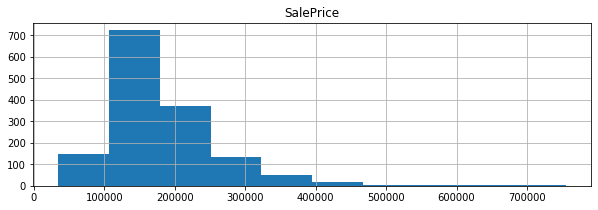

In [32]:
#Plotting a histogram for the target variable
train.hist(['SalePrice'], figsize=[10,3])

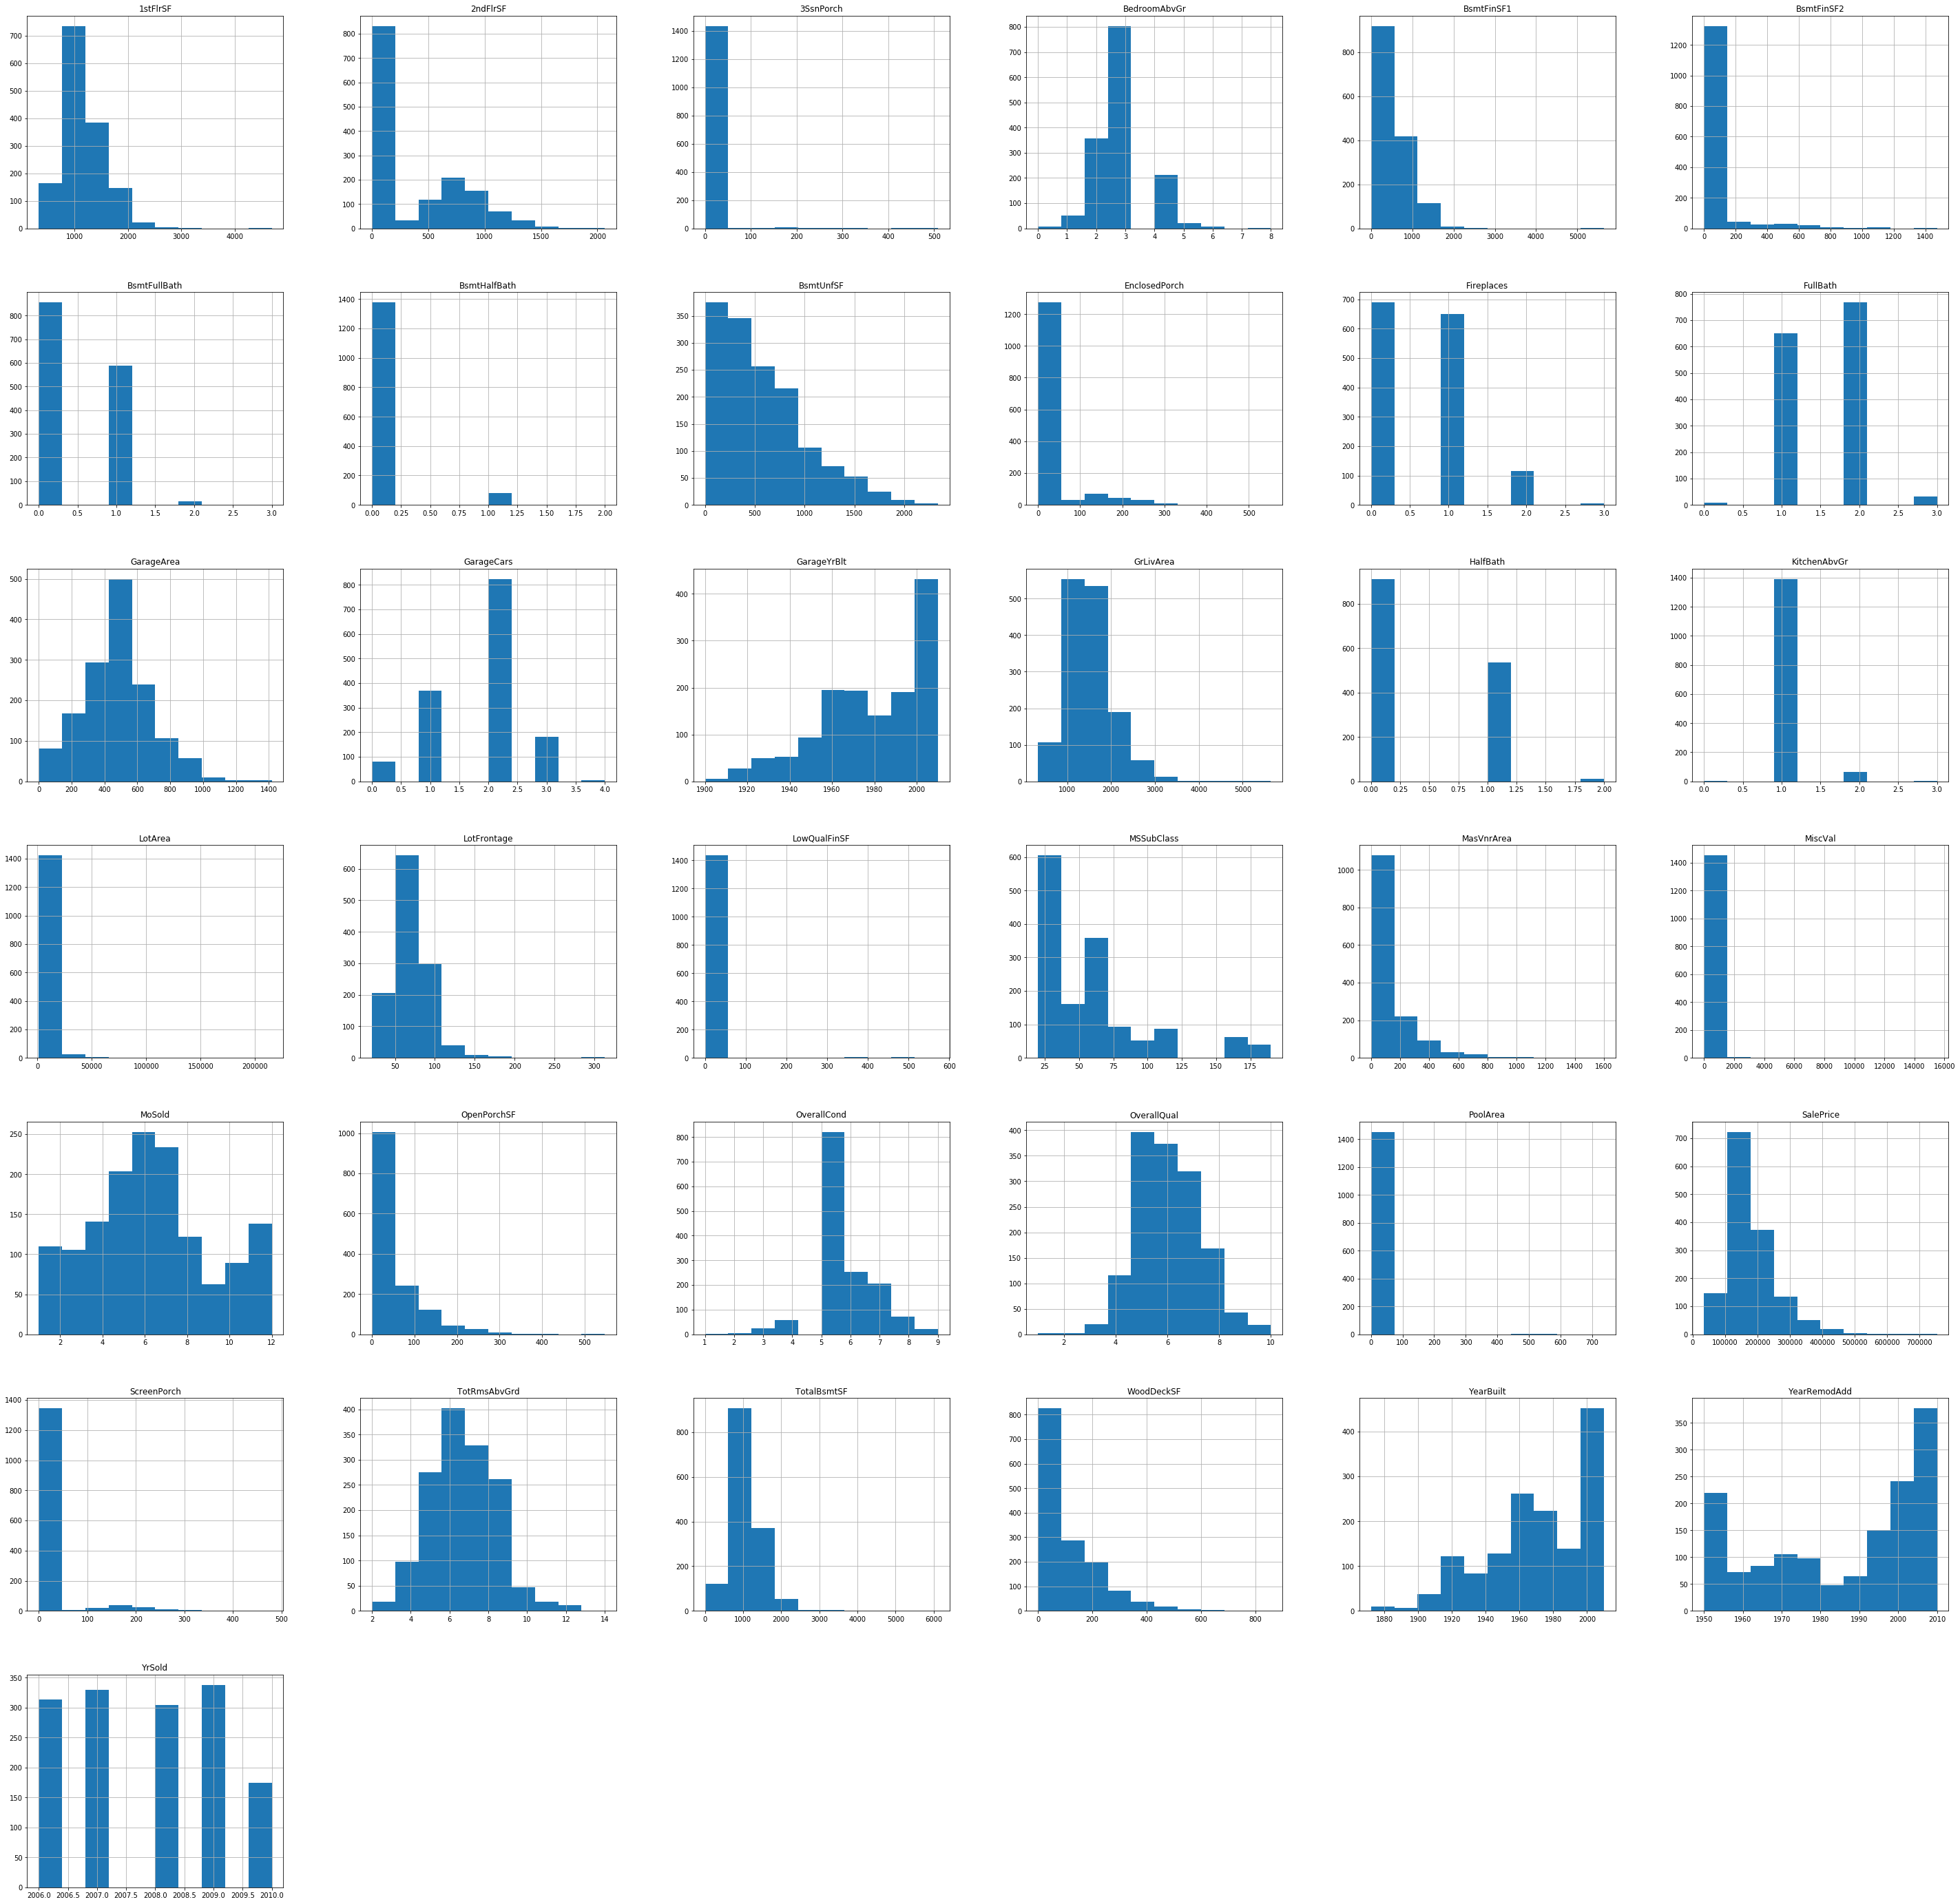

In [33]:
#Plotting multiple histograms  for all continuous columns together 
train.hist(figsize=[50,50])
plt.title("Column distribution with value counts")
plt.show()

In [754]:
#Rejected columns
#3SnPorch, BsmtHalfBath, EnclosedPorch, Lot area, LowQualFinSF, PoolArea, ScreenPorch, MiscVal

In [34]:
#Scatter plots for yearly data
train_yeardata= [feature for feature in train if "Year" in feature or "Yr" in feature]
print(train_yeardata)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


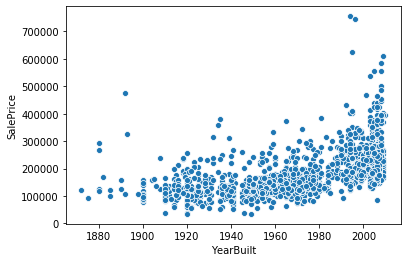

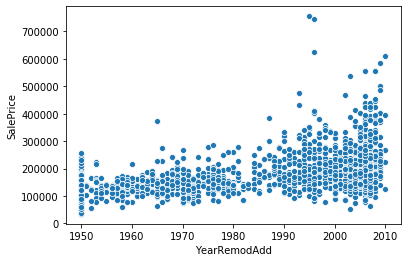

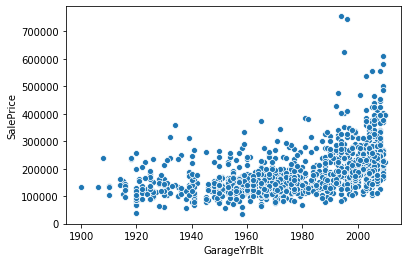

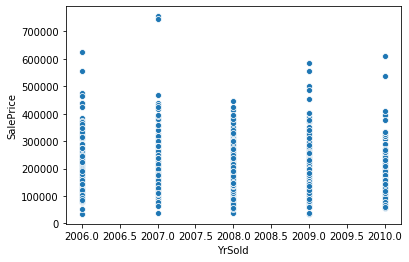

In [35]:
for feature in train_yeardata:
    sns.scatterplot(x=feature, y="SalePrice",data=train)
    plt.show()

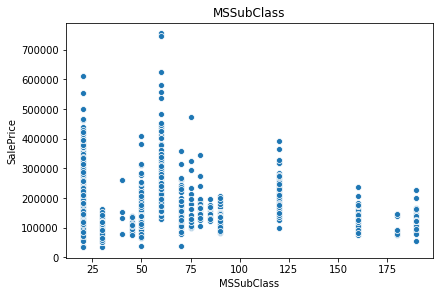

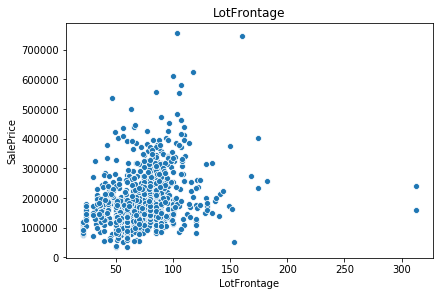

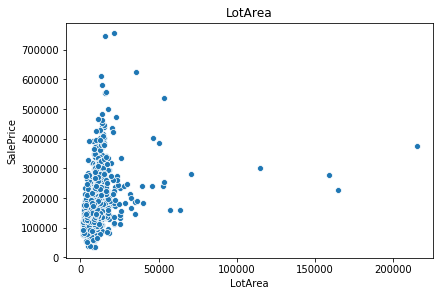

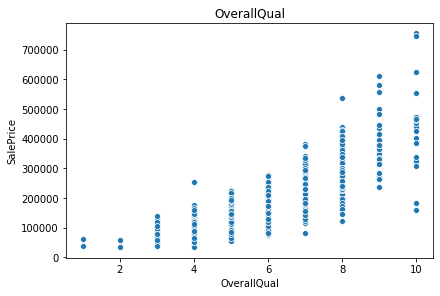

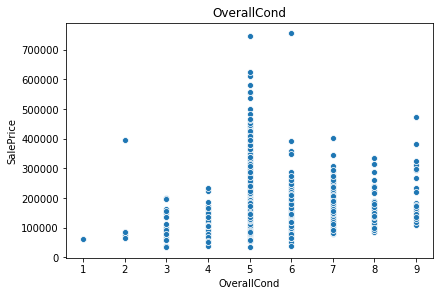

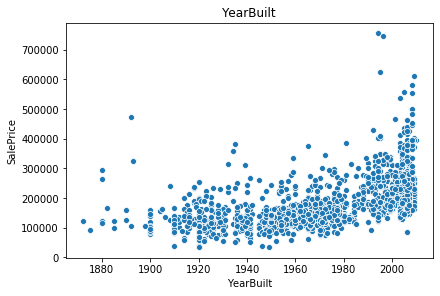

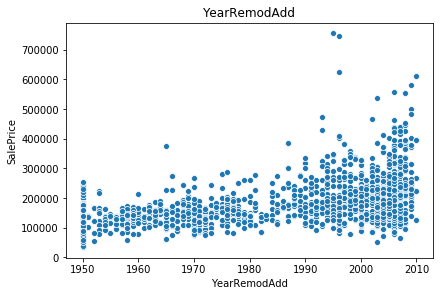

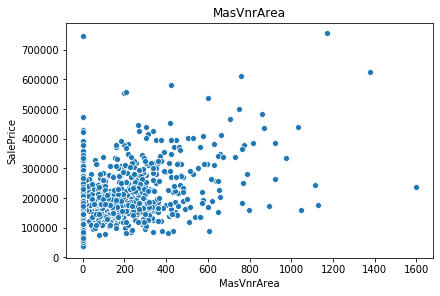

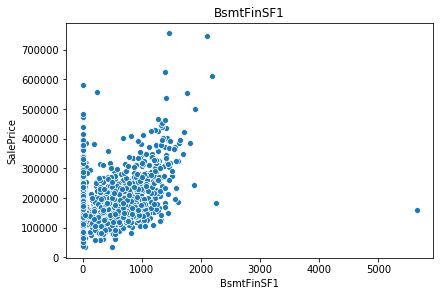

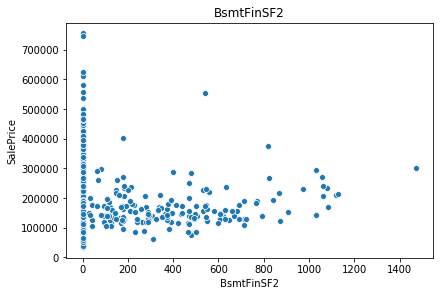

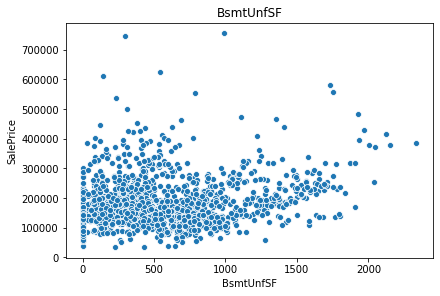

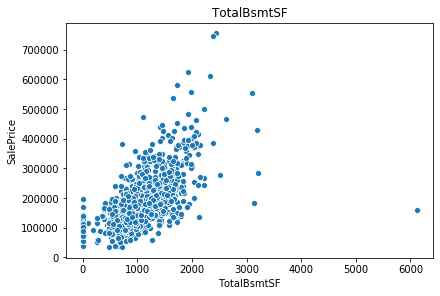

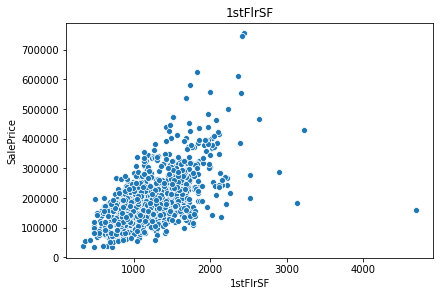

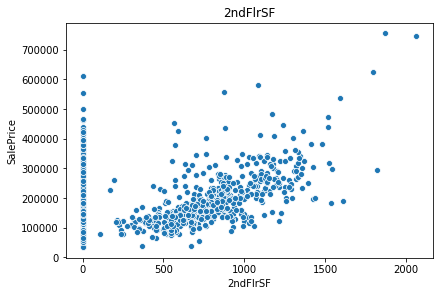

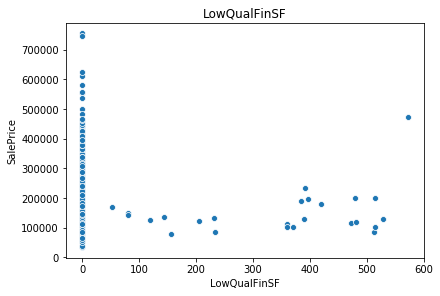

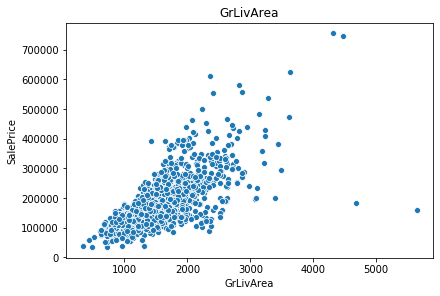

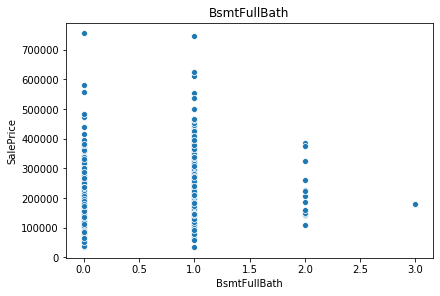

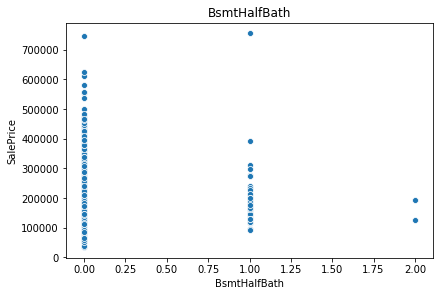

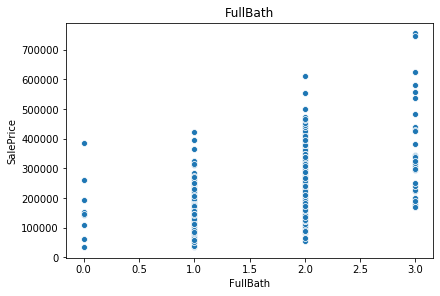

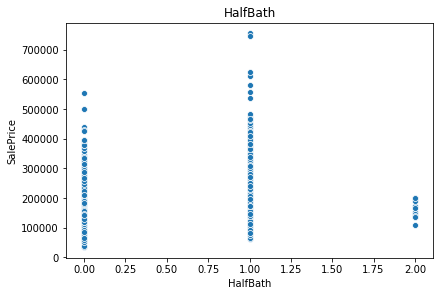

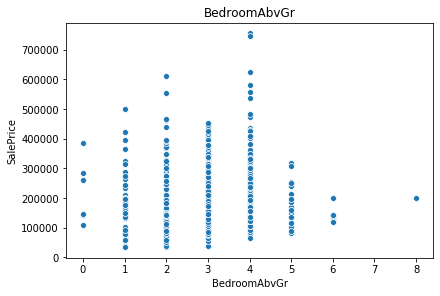

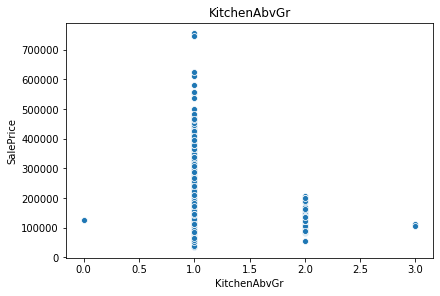

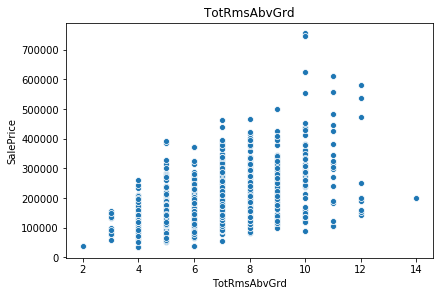

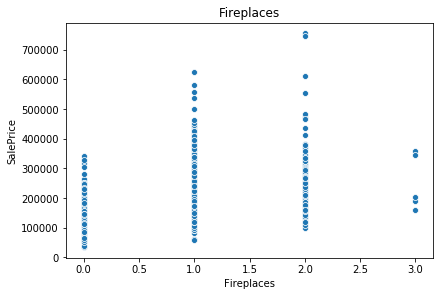

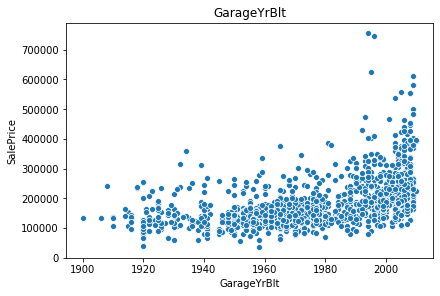

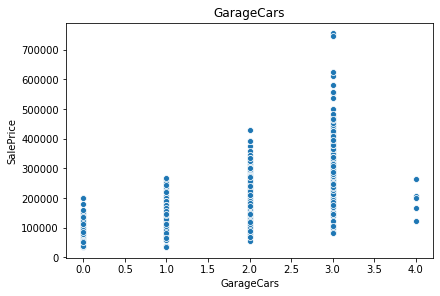

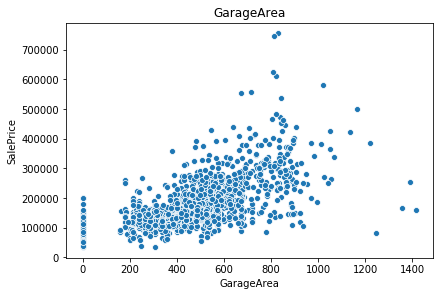

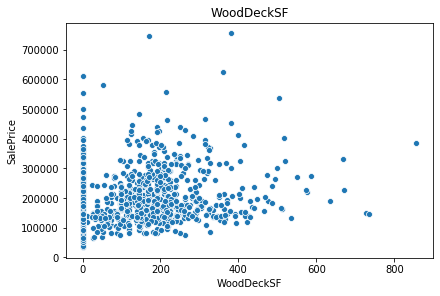

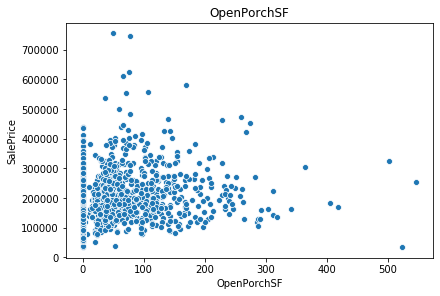

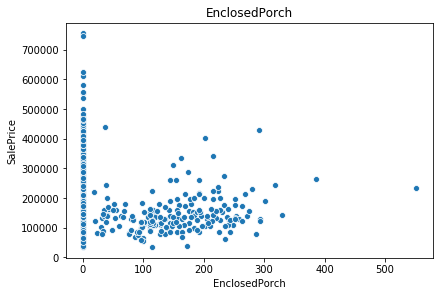

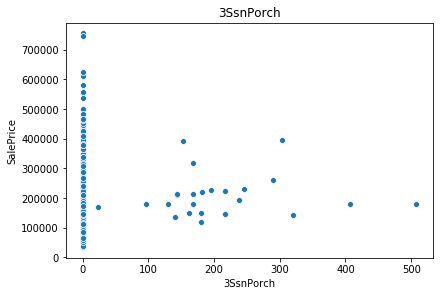

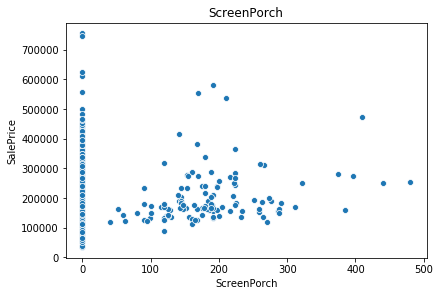

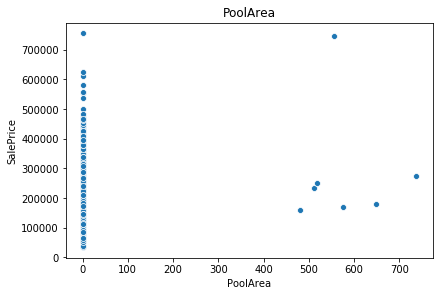

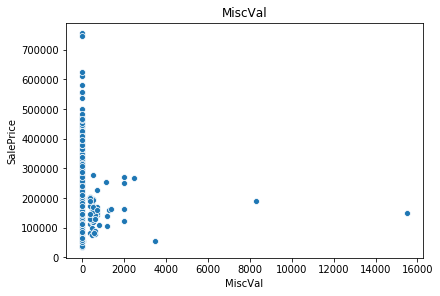

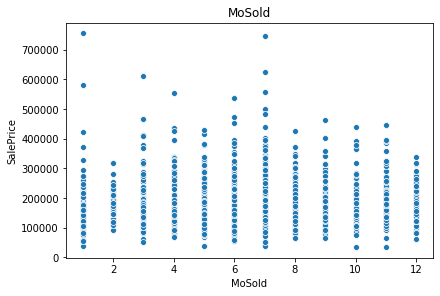

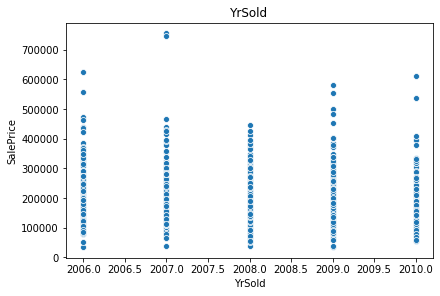

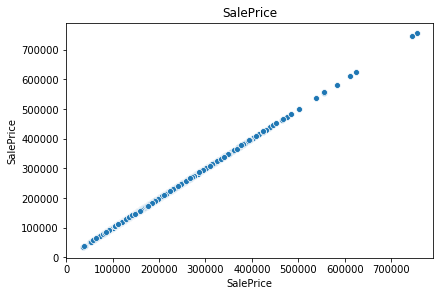

In [36]:
#Scatter plots
def scatterplot(train,feature,SalePrice):
    plt.figure(constrained_layout=True)
    sns.scatterplot(train[feature],train[SalePrice])
    plt.title(feature)
    plt.show()
for feature in Continuous_columns:
    scatterplot(train,feature,"SalePrice")

In [37]:
# Creating the correlation matrix
Correlationtraindata=train.corr()
Correlationtraindata

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [38]:
# Filtering only those columns where absolute correlation > 0.5 with Price
Correlationtraindata['SalePrice'][abs(Correlationtraindata['SalePrice']) > 0.5 ]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [761]:
#selecting the about columns for predictive modelling

In [39]:
Correlationtraindata['SalePrice'][abs(Correlationtraindata['SalePrice']) < 0.2]

MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
BsmtHalfBath    -0.016844
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [763]:
#Rejected columns with less 0.2 correlation
#3SnPorch, BsmtHalfBath, EnclosedPorch, Lot area, LowQualFinSF, PoolArea, ScreenPorch, MiscVal

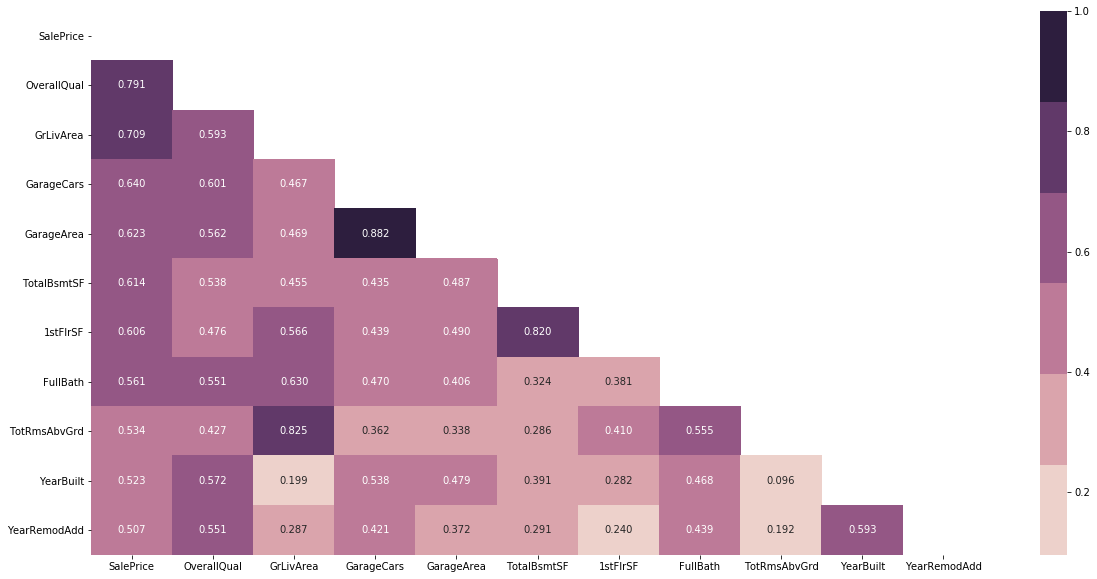

In [40]:
#Correlation Mapping
corr_map= train.corr().nlargest(11,"SalePrice")["SalePrice"].index
cmap = np.corrcoef(train[corr_map].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_map.values,
            yticklabels = corr_map.values,
            mask=mask)

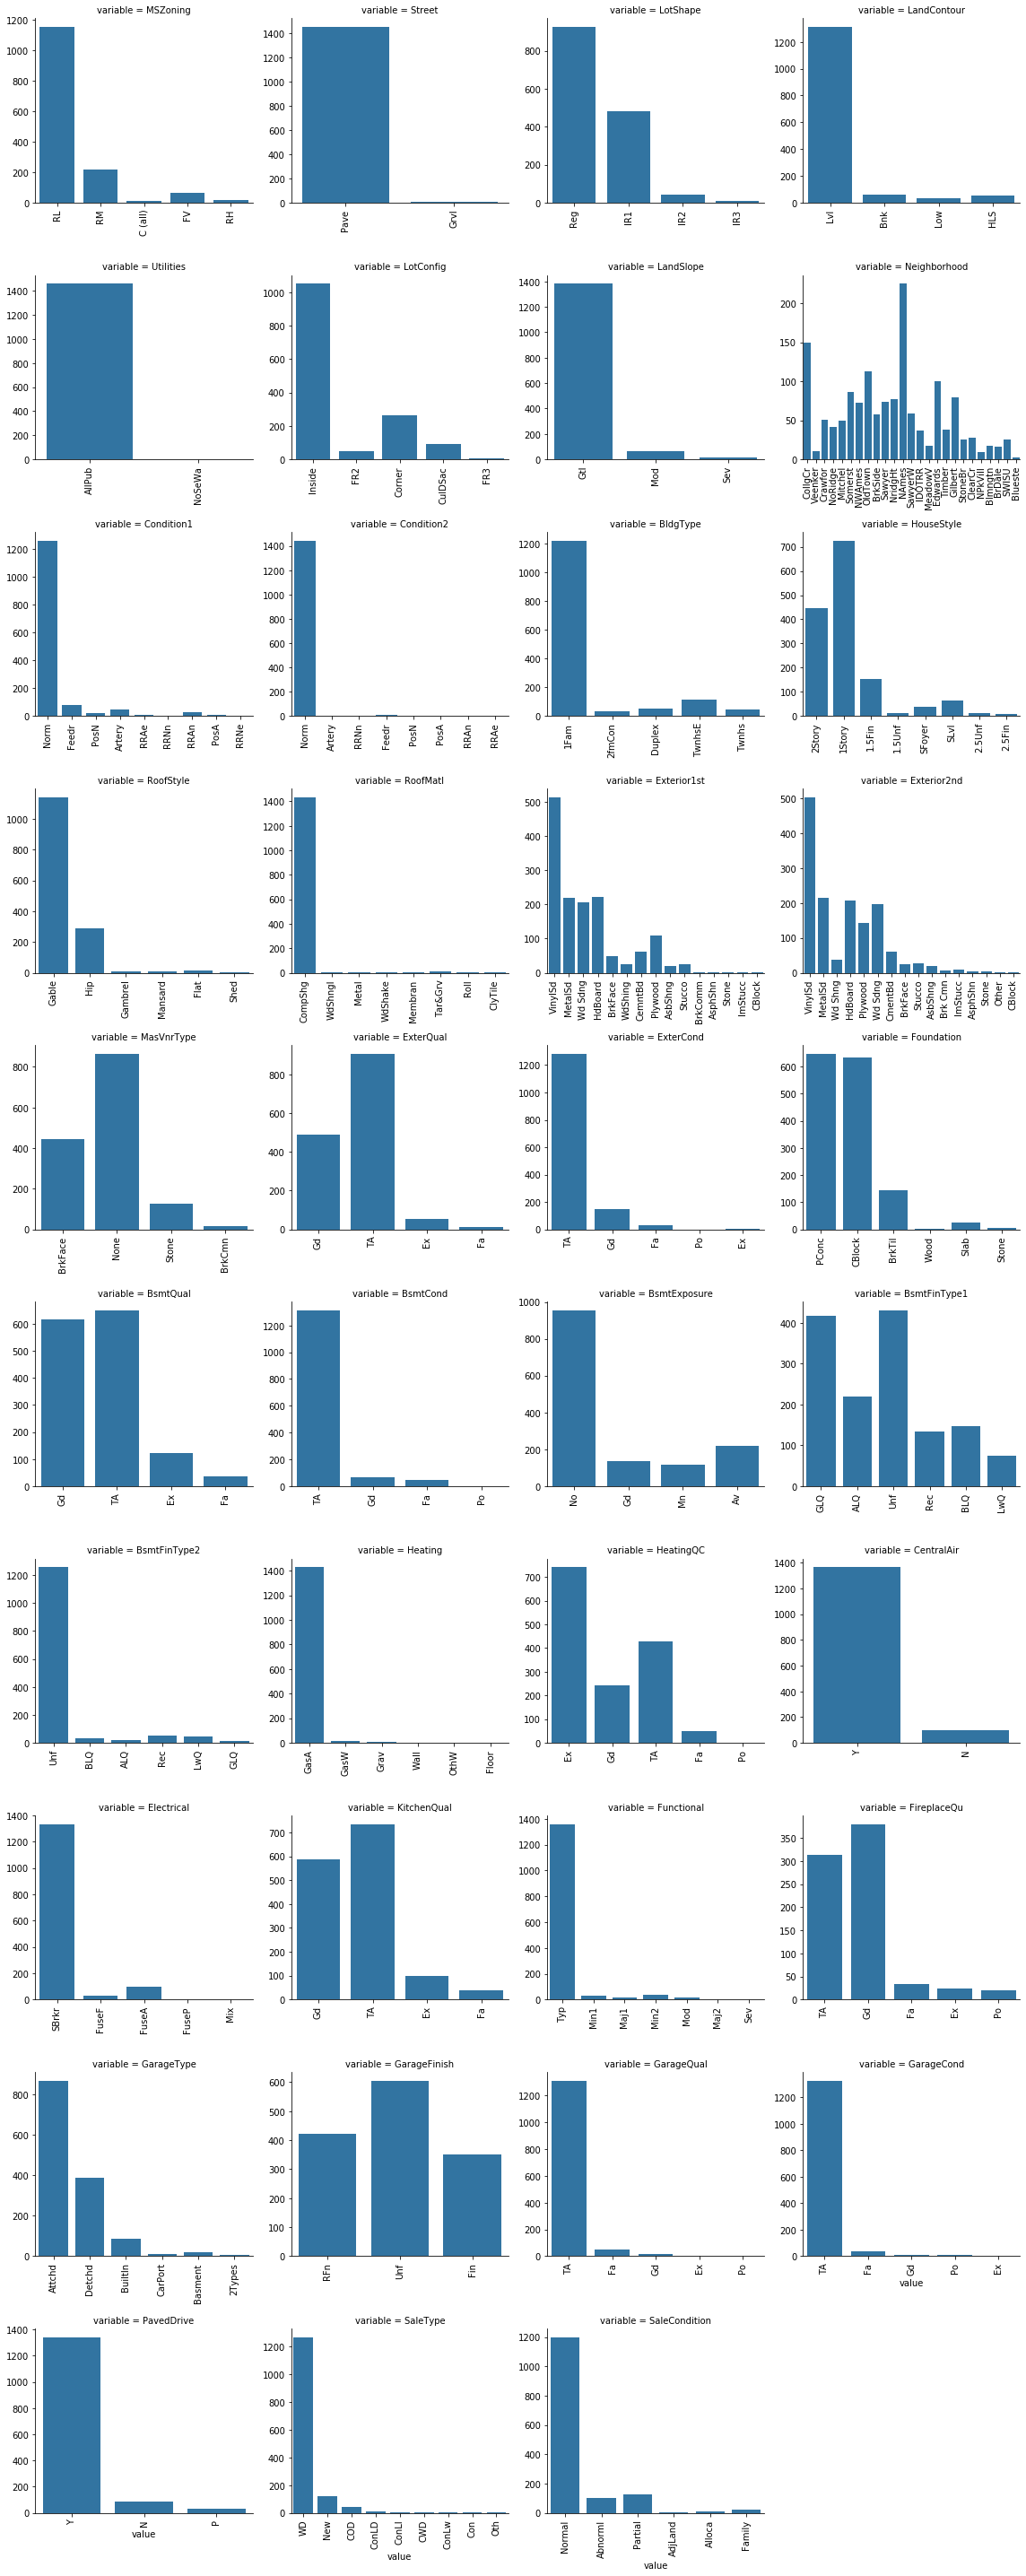

In [41]:
#Plotting bar charts for all categorical columns uning seaborn 
ConvertedCatDataMelt=Categorical_columns.melt()

CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4 ,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

In [42]:
#Rejected columns
# Street, Utilities, LanSlope, Condition2, RoofMat1, BsmtCond, BsmtFinType2
# Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, saleType

In [44]:
Category_grouplists=train.groupby('HouseStyle')['SalePrice'].apply(list)
# Performing the ANOVA test
Anova_Results = f_oneway(*Category_grouplists)

print('P-Value for Anova is: ', Anova_Results[1])

P-Value for Anova is:  3.376776535121222e-25


In [45]:
#Inova function for categorical variables 
def FunctionAnova(inp_data, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    #creating an empty list for selected predictors
    Selected_predictors=[]
    
    for predictor in CategoricalPredictorList:
        Category_grouplists=inp_data.groupby(predictor)[TargetVariable].apply(list)
        Anova_Results = f_oneway(*Category_grouplists)
        
        if(Anova_Results[1] < 0.05):
            print(predictor, 'is correlated with' , TargetVariable, '|P-Value:', Anova_Results[1])
            Selected_predictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated', TargetVariable, '|P-Value:', Anova_Results[1])
            
    return(Selected_predictors)
    

In [46]:
CategoricalPredictorList=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 
FunctionAnova(inp_data=train, TargetVariable='SalePrice', CategoricalPredictorList=CategoricalPredictorList)

MSZoning is correlated with SalePrice |P-Value: 8.817633866272648e-35
Street is NOT correlated SalePrice |P-Value: 0.11704860406782483
LotShape is correlated with SalePrice |P-Value: 6.447523852011766e-25
LandContour is correlated with SalePrice |P-Value: 2.7422167521379096e-08
Utilities is NOT correlated SalePrice |P-Value: 0.5847167739689381
LotConfig is correlated with SalePrice |P-Value: 3.163167473604189e-06
LandSlope is NOT correlated SalePrice |P-Value: 0.1413963584114019
Neighborhood is correlated with SalePrice |P-Value: 1.5586002827707996e-225
Condition1 is correlated with SalePrice |P-Value: 8.904549416138853e-08
Condition2 is correlated with SalePrice |P-Value: 0.043425658360948464
BldgType is correlated with SalePrice |P-Value: 2.0567364604967015e-10
HouseStyle is correlated with SalePrice |P-Value: 3.376776535121222e-25
RoofStyle is correlated with SalePrice |P-Value: 3.653523047099125e-17
RoofMatl is correlated with SalePrice |P-Value: 7.231444779987188e-08
Exterior1st i

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Data preprocessing 

In [47]:
DropCatCols=['Electrical','Functional', 'Heating', 'BsmtFinType2', 'Condition2' , 'LandSlope', 'Utilities' , 'Street',]

train.drop(DropCatCols, axis=1, inplace=True)

In [48]:
DropCatCols2=['Electrical','Functional', 'Heating', 'BsmtFinType2', 'Condition2' , 'LandSlope', 'Utilities' , 'Street']

test.drop(DropCatCols, axis=1, inplace=True)

In [49]:
DropConCols=['3SsnPorch', 'BsmtHalfBath', 'EnclosedPorch', 'LotArea', 'LowQualFinSF', 'PoolArea', 'ScreenPorch', 'MiscVal',
            'MSSubClass','OverallCond','BsmtFinSF2','BedroomAbvGr', 'KitchenAbvGr', 'MoSold', 'YrSold']

train.drop(DropConCols, axis=1, inplace=True)

In [50]:
DropConCols2=['3SsnPorch', 'BsmtHalfBath', 'EnclosedPorch', 'LotArea', 'LowQualFinSF', 'PoolArea', 'ScreenPorch', 'MiscVal',
            'MSSubClass','OverallCond','BsmtFinSF2','BedroomAbvGr', 'KitchenAbvGr', 'MoSold', 'YrSold']

test.drop(DropConCols, axis=1, inplace=True)

In [51]:
train.columns

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [52]:
test.columns

Index(['MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
UniqueValues=Categorical_columns.columns
print("Number of unique values are as below:")
for i in UniqueValues:
    uniqueValues=Categorical_columns[i].nunique()
    print(i,uniqueValues)

Number of unique values are as below:
MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


In [54]:
train.shape

(1460, 53)

In [55]:
test.shape

(1459, 52)

In [56]:
NANcolumns=[]
i=-1
for a in train.isnull().sum():
    i+=1
    if a!=0:
        print(train.columns[i],a)
        NANcolumns.append(train.columns[i])

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [57]:
NANcolumns=[]
i=-1
for a in test.isnull().sum():
    i+=1
    if a!=0:
        print(test.columns[i],a)
        NANcolumns.append(test.columns[i])

MSZoning 4
LotFrontage 227
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
KitchenQual 1
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
SaleType 1


In [58]:
#filling all the cat cols
missing_col = ["FireplaceQu","GarageType","GarageFinish",
               "GarageQual","GarageCond",'BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','MasVnrType']

for col in missing_col:
    train[col] = train[col].fillna("None") 

In [59]:
missing_col2 = ["FireplaceQu","GarageType","GarageFinish",
               "GarageQual","GarageCond","GarageArea",'BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','MasVnrType']

for col in missing_col:
    test[col] = test[col].fillna("None") 

In [60]:
#interpolating all the con cols with missing values
#LotFrontage, MasVnrArea
MedValue_LotFrontage=train['LotFrontage'].median()
train['LotFrontage']=train['LotFrontage'].fillna(value=MedValue_LotFrontage)

# Replacing by interpolation for a numeric variable
train['MasVnrArea']=train['MasVnrArea'].interpolate(method='linear')


In [61]:
#interpolating all the con cols with missing values
#LotFrontage, MasVnrArea
MedValue_LotFrontage=test['LotFrontage'].median()
test['LotFrontage']=test['LotFrontage'].fillna(value=MedValue_LotFrontage)

# Replacing by interpolation for a numeric variable
test['MasVnrArea']=test['MasVnrArea'].interpolate(method='linear')

In [62]:
NANcolumns=[]
i=-1
for a in train.isnull().sum():
    i+=1
    if a!=0:
        print(train.columns[i],a)
        NANcolumns.append(train.columns[i])

GarageYrBlt 81


In [63]:
NANcolumns=[]
i=-1
for a in test.isnull().sum():
    i+=1
    if a!=0:
        print(test.columns[i],a)
        NANcolumns.append(test.columns[i])

MSZoning 4
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
KitchenQual 1
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [64]:
train.loc[train["GarageFinish"] == "None" , "GarageYrBlt"] = train["YearBuilt"]

In [65]:
test.loc[test["GarageFinish"] == "None" , "GarageYrBlt"] = test["YearBuilt"]

In [66]:
train.isnull().sum()

MSZoning         0
LotFrontage      0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
SalePrice   

In [67]:
NANcolumns=[]
i=-1
for a in test.isnull().sum():
    i+=1
    if a!=0:
        print(test.columns[i],a)
        NANcolumns.append(test.columns[i])

MSZoning 4
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
KitchenQual 1
GarageCars 1
GarageArea 1
SaleType 1


In [68]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('None')
test['Exterior1st'] = test['Exterior1st'].fillna('None')
test['MSZoning'] = test['MSZoning'].fillna('None')
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna('None')
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna('None')

In [69]:

test['BsmtFullBath'] = test['BsmtFullBath'].fillna('None')
test['KitchenQual'] = test['KitchenQual'].fillna('None')
test['GarageCars'] = test['GarageCars'].fillna('None')
test['GarageArea'] = test['GarageArea'].fillna('None')
test['SaleType'] = test['SaleType'].fillna('None')

In [70]:
test.isnull().sum()

MSZoning         0
LotFrontage      0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      1
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
dtype: int64

In [71]:
test.shape

(1459, 52)

In [72]:
train.shape

(1460, 53)

In [73]:
# Dropping all categorical nominal columns
dropcategoricallist=['MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'CentralAir',
                     'SaleType', 'SaleCondition','MasVnrType', 'Exterior1st',
                     'Exterior2nd','Foundation']
train.drop(dropcategoricallist, axis=1, inplace=True)

In [74]:
dropcategoricallist2=['MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'CentralAir',
                     'SaleType', 'SaleCondition','MasVnrType', 'Exterior1st',
                     'Exterior2nd','Foundation']
test.drop(dropcategoricallist, axis=1, inplace=True)

In [75]:
test.shape

(1459, 41)

In [78]:
train.shape

(1460, 42)

In [76]:
train.columns

Index(['LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'BldgType',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [77]:
test.columns

Index(['LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'BldgType',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [54]:
# predictive columns [con]
# OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd    
# GarageCars, GarageArea     

# Concatenating both datasets:

concat = [train,test]

# Dropping the index of the DataFrame and replaces it with an index of increasing integers:

finaldata = pd.concat(concat).reset_index(drop=True) 

In [55]:
# PredCatCols= MSZoning','LotShape','LandContour', LotConfig','Neighborhood',Condition1', BldgType', HouseStyle', RoofStyle',
# RoofMatl', Exterior1st', Exterior2nd', MasVnrType','ExterQual','ExterCond', 'Foundation','BsmtQual','BsmtCond','BsmtExposure',
# BsmtFinType1',HeatingQC', CentralAir', Electrical', KitchenQual', 'FireplaceQu', GarageType', GarageFinish', GarageQual',
#'GarageCond', PavedDrive', SaleType', SaleCondition'

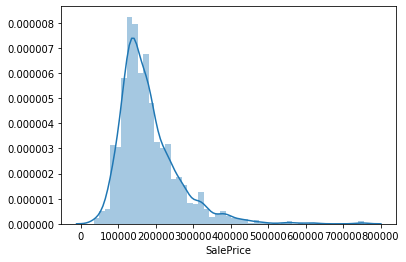

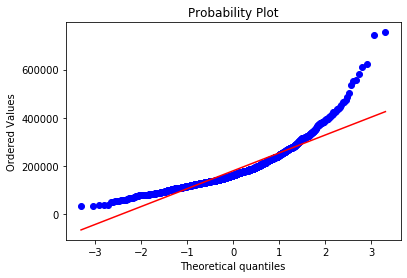

In [79]:
#Normalizing the dependant variabe saleprice
# Analyzing the Saleprice

sns.distplot(train['SalePrice'])
fig= plt.figure()

res= stats.probplot(train['SalePrice'], plot=plt)

In [80]:
#The SalePrice is drawn from a normal distribution
#The SalePrice is right skewed/ postively skewed, which indicates that most people are able to afford lower priced house.
#Present some mutliple outliers in SalePrice

In [81]:
# skewness and kurtosis
print('Skewness : %f '% train['SalePrice'].skew())
print('Kurtosis : %f '% train['SalePrice'].kurt())

Skewness : 1.882876 
Kurtosis : 6.536282 


In [82]:
#treatinf the outliers of SalePrice
train['SalePrice'] = np.log(train['SalePrice'])

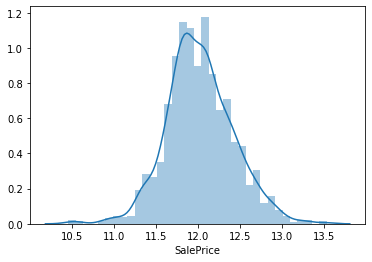

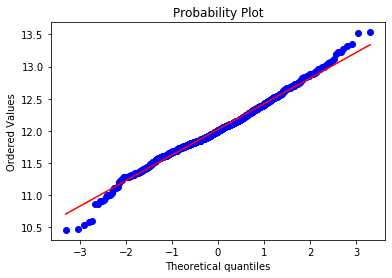

In [83]:
sns.distplot(train['SalePrice']);
fig = plt.figure()

res = stats.probplot(train['SalePrice'], plot=plt)


In [84]:
print('Skewness : %f '% train['SalePrice'].skew())
print('Kurtosis : %f '% train['SalePrice'].kurt())

Skewness : 0.121335 
Kurtosis : 0.809532 


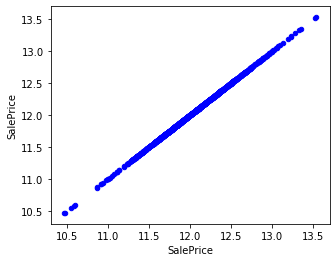

In [85]:
train.plot.scatter(x='SalePrice', y='SalePrice', figsize=(5,4), marker='o', color='blue')

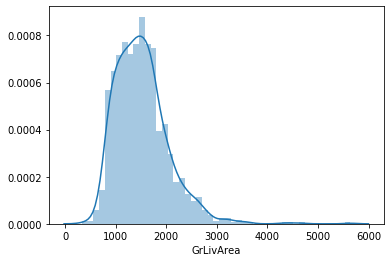

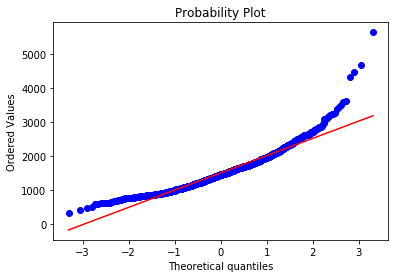

In [86]:
sns.distplot(train['GrLivArea'])
fig= plt.figure()

res= stats.probplot(train['GrLivArea'], plot=plt)

In [87]:
train['GrLivArea'] = np.log(train['GrLivArea'])

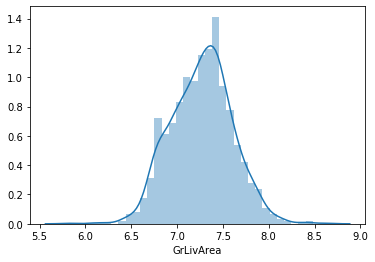

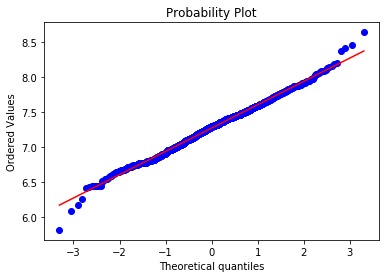

In [88]:
sns.distplot(train['GrLivArea'])
fig= plt.figure()

res= stats.probplot(train['GrLivArea'], plot=plt)

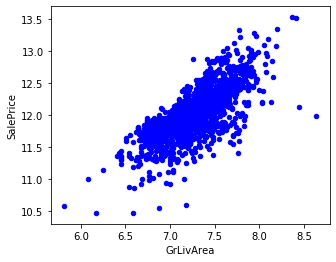

In [89]:
train.plot.scatter(x='GrLivArea', y='SalePrice', figsize=(5,4), marker='o', color='blue')

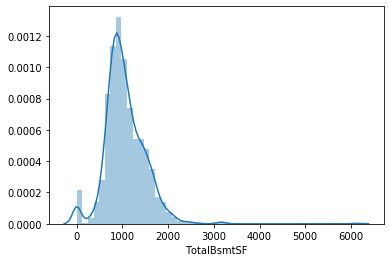

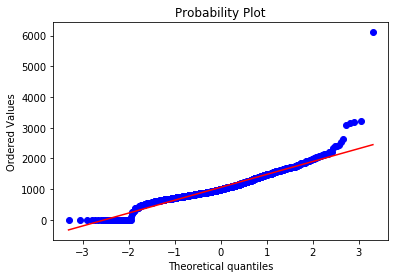

In [90]:
sns.distplot(train['TotalBsmtSF'])
fig= plt.figure()

res= stats.probplot(train['TotalBsmtSF'], plot=plt)

In [91]:
print('Skewness : %f '% train['TotalBsmtSF'].skew())
print('Kurtosis : %f '% train['TotalBsmtSF'].kurt())

Skewness : 1.524255 
Kurtosis : 13.250483 


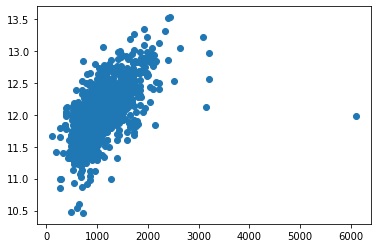

In [92]:
# scatter plot 
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [93]:
# Correlation increases after outlier removal in data
train[['SalePrice','TotalBsmtSF','GrLivArea']].corr()

,SalePrice,TotalBsmtSF,GrLivArea
SalePrice,1.000000,0.612134,0.730255
TotalBsmtSF,0.612134,1.000000,0.435852
GrLivArea,0.730255,0.435852,1.000000


# Converting the data into numeric form

In [95]:
# convert categorical variable into dummy
train= pd.get_dummies(train)

In [96]:
test= pd.get_dummies(test)

In [97]:
train.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,7,2003,2003,196.0,706,150,856,856,854,...,1,0,0,0,0,0,1,0,0,1
1,80.0,6,1976,1976,0.0,978,284,1262,1262,0,...,1,0,0,0,0,0,1,0,0,1
2,68.0,7,2001,2002,162.0,486,434,920,920,866,...,1,0,0,0,0,0,1,0,0,1
3,60.0,7,1915,1970,0.0,216,540,756,961,756,...,1,0,0,0,0,0,1,0,0,1
4,84.0,8,2000,2000,350.0,655,490,1145,1145,1053,...,1,0,0,0,0,0,1,0,0,1


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 126 entries, LotFrontage to PavedDrive_Y
dtypes: float64(5), int64(17), uint8(104)
memory usage: 450.6 KB


# ML MODELING 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [102]:
# Let's separate data:

train_data = pd.DataFrame(train[:1460])
test_data = pd.DataFrame(train[1460:])


In [107]:
# Building machine learning models
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [112]:
!pip install xgboost

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost

In [127]:
X1 = train.drop('SalePrice', axis=1)
y1 = train['SalePrice']

In [129]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=2333)

In [142]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1022, 125)
(1022,)
(438, 125)
(438,)


In [130]:
X1.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,7,2003,2003,196.0,706,150,856,856,854,...,1,0,0,0,0,0,1,0,0,1
1,80.0,6,1976,1976,0.0,978,284,1262,1262,0,...,1,0,0,0,0,0,1,0,0,1
2,68.0,7,2001,2002,162.0,486,434,920,920,866,...,1,0,0,0,0,0,1,0,0,1
3,60.0,7,1915,1970,0.0,216,540,756,961,756,...,1,0,0,0,0,0,1,0,0,1
4,84.0,8,2000,2000,350.0,655,490,1145,1145,1053,...,1,0,0,0,0,0,1,0,0,1


In [132]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
BostonRegressor = LinearRegression()
BostonRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
# Evaluating the model
print('BostonRegressor Train Score is : ' , BostonRegressor.score(X_train, y_train)*100)
print('BostonRegressor Test Score is : ' , BostonRegressor.score(X_test, y_test)*100)

BostonRegressor Train Score is :  89.83643379756164
BostonRegressor Test Score is :  82.53317239721711


In [134]:
# Predicting the Test set results
y_pred = BostonRegressor.predict(X_test)
mean_absolute_error(y_test, y_pred)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_pred))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_pred))

Mena Squard Error IS :      0.0313509159696947
Mean Absolute Error Is :    0.10730407843216921
Median Absolute Error Is :  0.07234062621331994


In [135]:
# Function to invert target variable array from log scale
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "algortihm name + RMSE"
rmse_compare = pd.Series()
rmse_compare.index.name = "Model"

# Series to collect the accuracy for the different algorithms: "algorithms name + score"
scores_compare = pd.Series()
scores_compare.index.name = "Model"


In [136]:
# Model 1: Linear Regression =======================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

In [137]:
#Model 2: Decision Tress ===========================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTreeRegressor'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTreeRegressor'] = dtree_score

In [138]:
# Model 3: Random Forest ==========================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

In [139]:
# Model 4: Gradient Boostinf Regression ===========
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoostingRegression'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoostingRegression'] = gbr_score

In [140]:
print("RMSE values for different algorithms:")
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
GradientBoostingRegression    36285.0
RandomForest                  40155.0
DecisionTreeRegressor         46450.0
LinearRegression              56418.0
dtype: float64

In [141]:
print("Accuracy scores for different algorithms")
scores_compare.sort_values(ascending=False).round(3)

Accuracy scores for different algorithms


Model
GradientBoostingRegression    86.251
RandomForest                  84.115
LinearRegression              82.533
DecisionTreeRegressor         73.303
dtype: float64

In [145]:
final_model = GradientBoostingRegressor()
final_model = final_model.fit(X_train,y_train)